<center>
<h1> SOLUCIÓN TAREA 9</h1>
<h3>Diego Godoy Rojas & Luis Carlos Diaz </h3>
</center>

In [9]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import distance

Se usan tres fotos tomadas en la calle para ver los resultados de la segmentación basada en umbrales y en bordes.

In [35]:
img = [cv2.imread('fig/street.jpg', 0),
      cv2.imread('fig/street1.jpg', 0),
      cv2.imread('fig/street2.jpg', 0)]

<h1>Segmentación basada en umbrales</h1>

Se aplica una umbralización a las imágenes de prueba, donde los valores mayores al umbral toman el valor máximo y los menores van a cero. Viendo los histogramas se ven dos partes independientes, que en los tres casos ses separan en 100. Como resultado se puede ver que los objetos se distinguen del suelo.

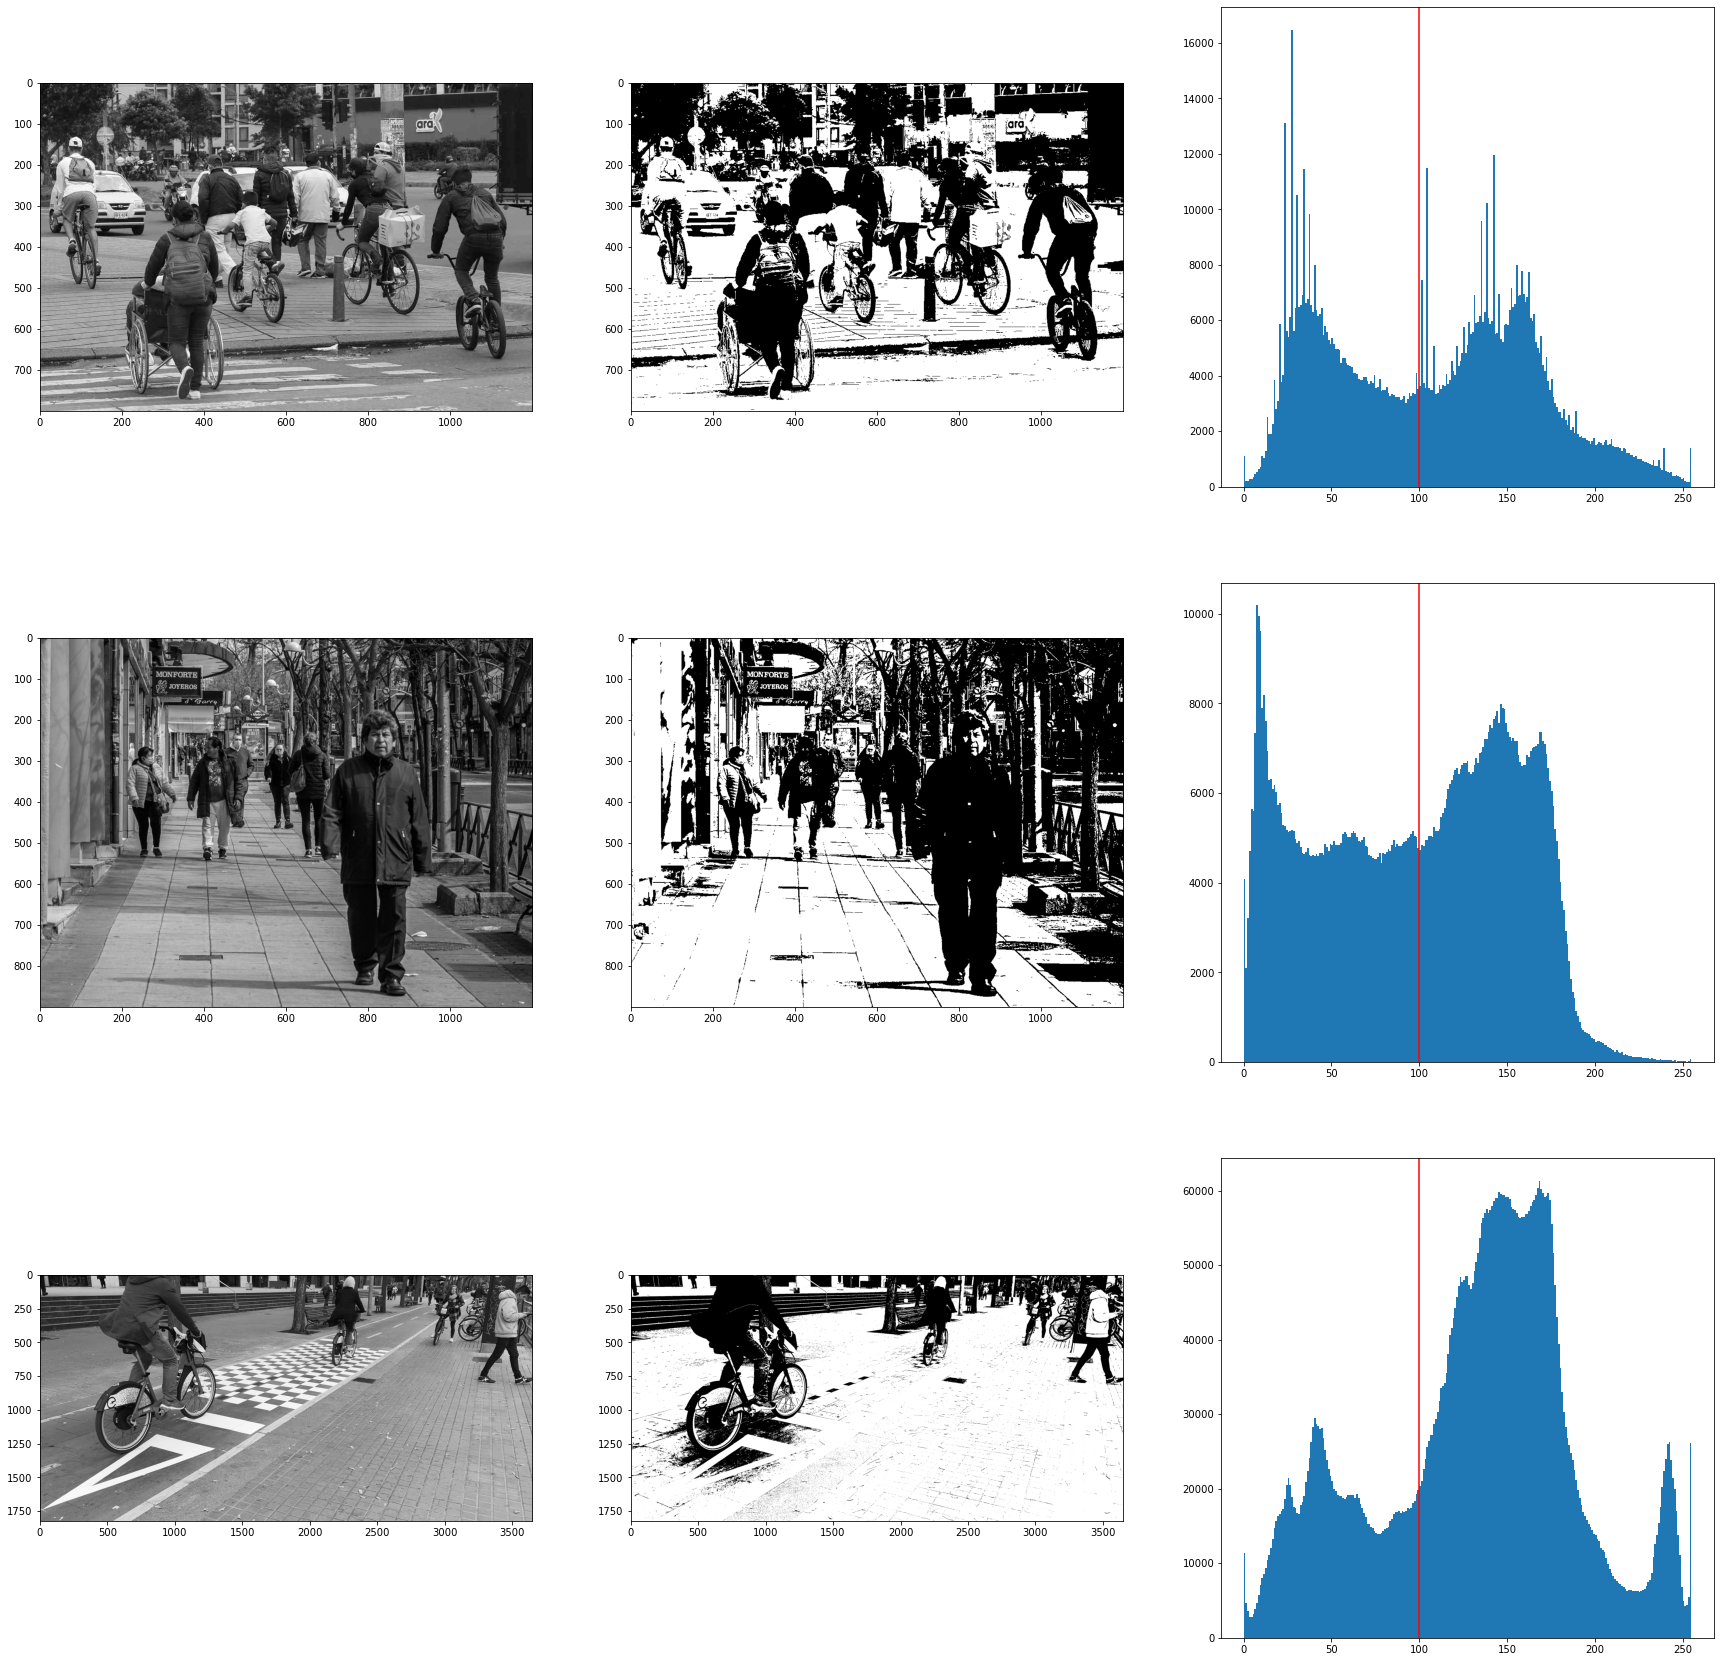

In [16]:
cont=0
n=len(img)
thr=100

plt.figure(1, figsize=[30,30])
for imgTest in img:
    trh, imgBin=cv2.threshold(imgTest, thr, 255, cv2.THRESH_BINARY)
    
    plt.subplot(n,3,1+cont*3)
    plt.imshow(imgTest,cmap='gray')
    plt.subplot(n,3,2+cont*3)
    plt.imshow(imgBin,cmap='gray')
    plt.subplot(n,3,3+cont*3)
    plt.hist(imgTest.ravel(), bins=255)
    plt.axvline(thr, color='r')
    
    cont+=1

Al usar una umbralización adaptativa basada en la media se puede ver como las superficies de los objetos adquieren pertenecen a una sola region con bordes bien definidos, pero a diferencia de la anterior no hay una diferencia clara con el suelo o el fondo.

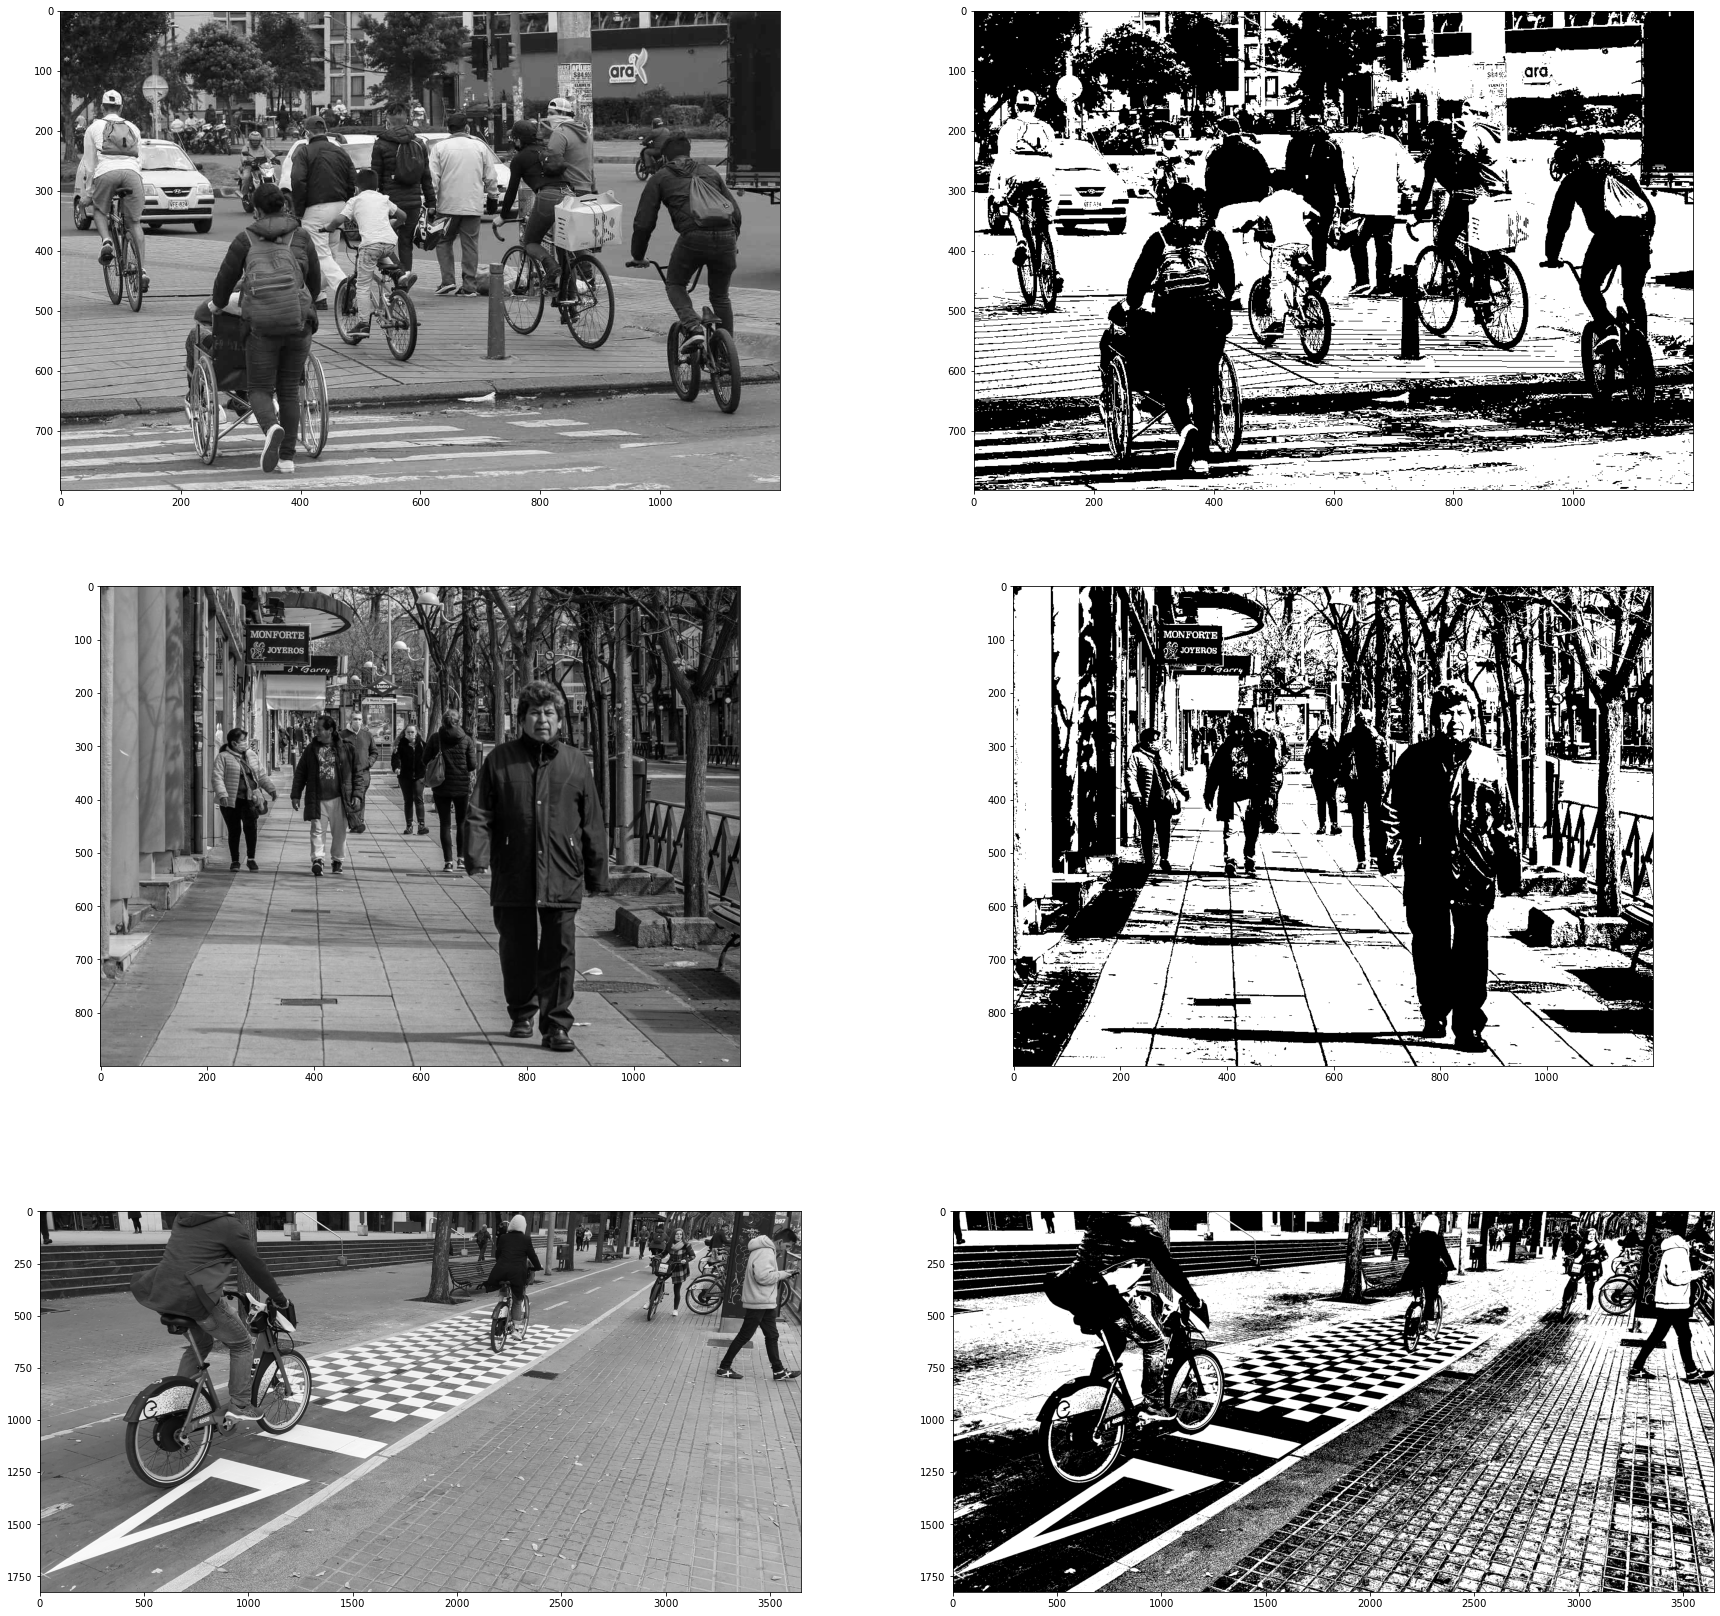

In [34]:
cont=0
n=len(img)

plt.figure(1, figsize=[30,30])
for imgTest in img:
    imgBin=cv2.adaptiveThreshold(imgTest, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 601, 0)
    
    plt.subplot(n,2,1+cont*2)
    plt.imshow(imgTest,cmap='gray')
    plt.subplot(n,2,2+cont*2)
    plt.imshow(imgBin,cmap='gray')
    
    cont+=1

<h1>Segmentación basada en bordes</h1>

En primer lugar se muestran los resultados del filtro de Sobel en las direcciones X y Y, es claro como en cada uno extrae los bordes en la respectiva dirección. Por ejemplo si se requiere identificar peatones que en su mayoria tienen bordes verticales conviene usar el filtro en la dirección X, se puede ver como los bordes son claros en ese caso en cambio en la dirección Y aparece una gran cantidad de bordes que resaltan aspectos del suelo o de los automobiles en el caso de la primer imágen.
La diferencia de las dos direcciones es clara en la sesgunda imágen de prueba donde los bordes de la persona en primer plano se resaltan en la dirección X, pero los bordes de su sombra aparecen al aplicar el filtro en la dirección Y.

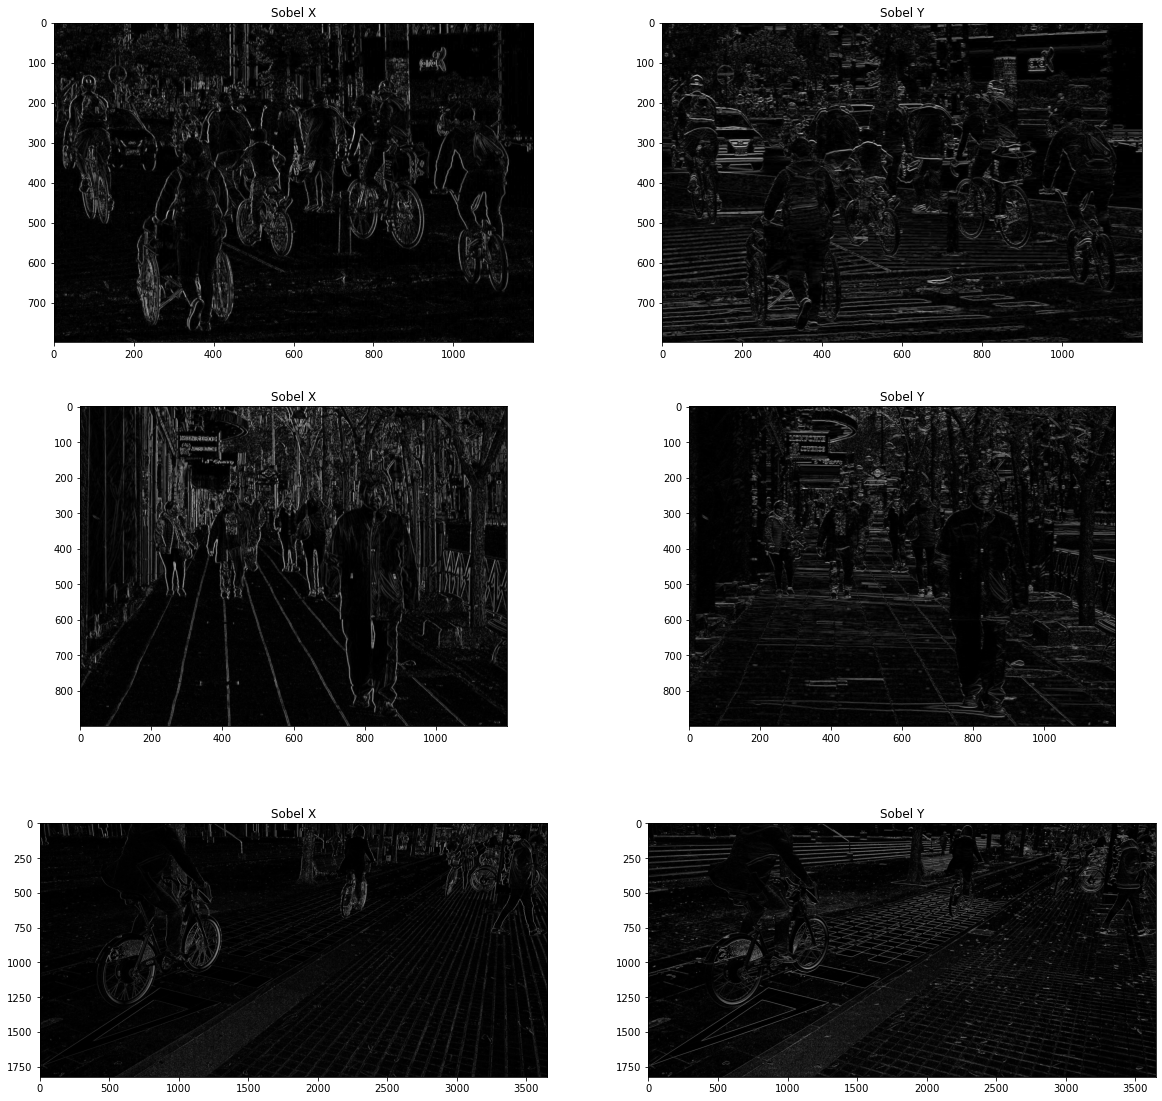

In [36]:
cont=0
n=len(img)

plt.figure(1, figsize=[20,20])
for imgTest in img:
    sobX=np.absolute(cv2.Sobel(imgTest, cv2.CV_64F, 1, 0, ksize=5))
    sobY=np.absolute(cv2.Sobel(imgTest, cv2.CV_64F, 0, 1, ksize=5))
    
    plt.subplot(n,2,1+cont*2)
    plt.imshow(sobX,cmap='gray')
    plt.title("Sobel X")
    plt.subplot(n,2,2+cont*2)
    plt.title("Sobel Y")
    plt.imshow(sobY,cmap='gray')
    
    cont+=1

Para contrastar el resultado anterior es implementa el laplaciano y se compara, con la suma de aplicar el filtro de Sobel en ambas direcciones, en este caso se puede ver que el Laplaciano es muy sensible al ruido, por otro lado el filtro de Sobel muestra los bordes bien resaltados en una versión limpia de la imágen.

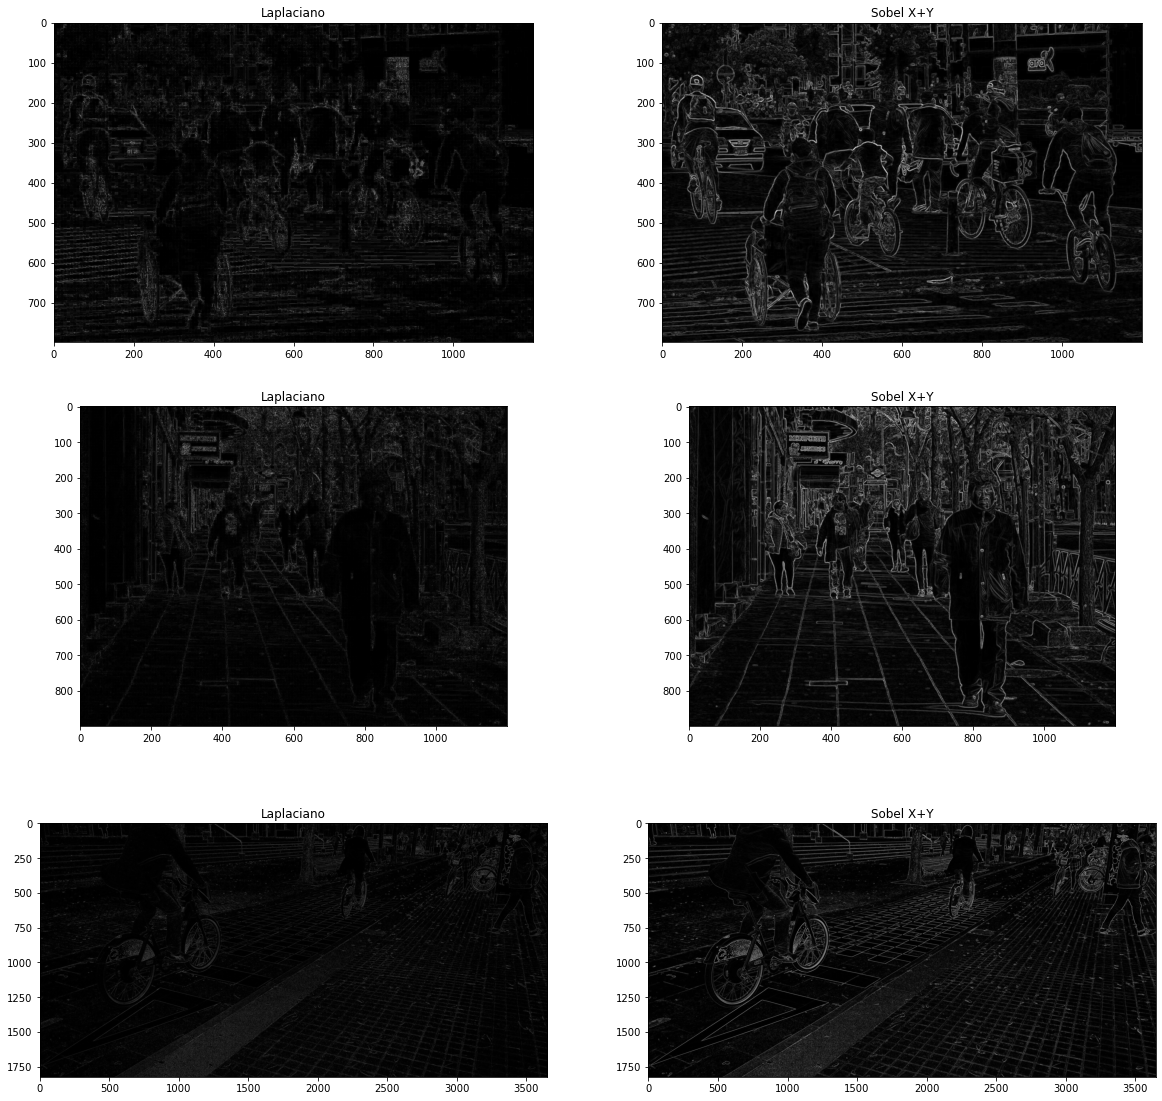

In [37]:
cont=0
n=len(img)

plt.figure(1, figsize=[20,20])
for imgTest in img:
    lap=np.absolute(cv2.Laplacian(imgTest, cv2.CV_64F))
    sobX=np.absolute(cv2.Sobel(imgTest, cv2.CV_64F, 1, 0, ksize=5))
    sobY=np.absolute(cv2.Sobel(imgTest, cv2.CV_64F, 0, 1, ksize=5))
    
    plt.subplot(n,2,1+cont*2)
    plt.imshow(lap,cmap='gray')
    plt.title("Laplaciano")
    plt.subplot(n,2,2+cont*2)
    plt.title("Sobel X+Y")
    plt.imshow(sobX+sobY,cmap='gray')
    
    cont+=1

En los ejemplos anteriores se ve como el ruido no permite una obtención de bordes claros, debido a esto se usa el algoritmo Canny para detección de bordes implemetado en OpenCv, este algoritmo realiza una reduccion de ruido antes de el análisis del gradiente, para después realizar una supresión de no máximos y finalmente determina que pixeles pertenecen a un borde.
El resultado es una imágen donde solo aparecen los bordes sin ruido.

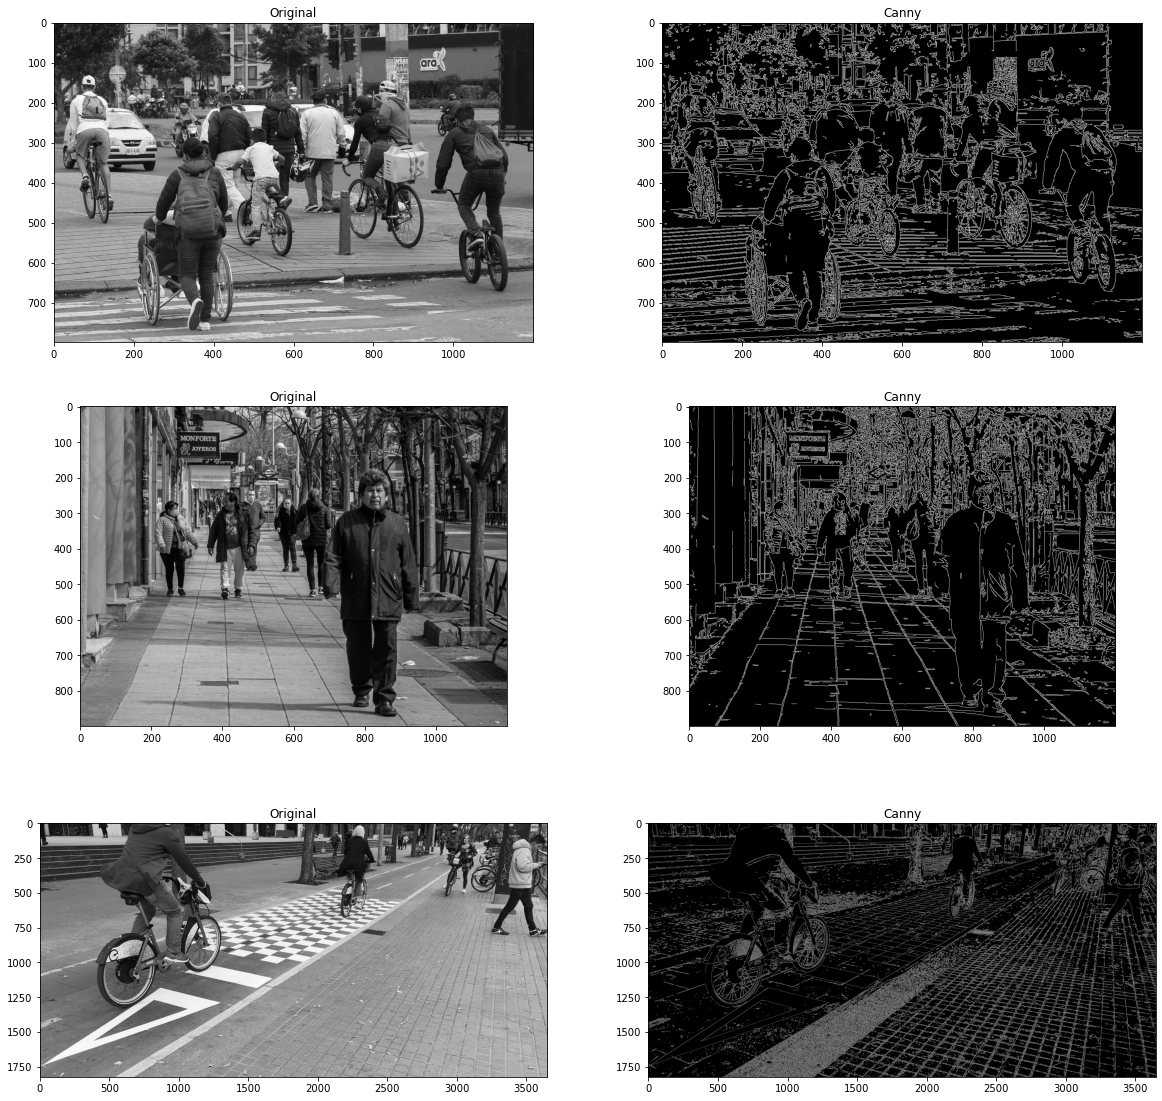

In [8]:
cont=0
n=len(img)

plt.figure(1, figsize=[20,20])
for imgTest in img:
    can=cv2.Canny(imgTest, 100, 200)
    
    plt.subplot(n,2,1+cont*2)
    plt.imshow(imgTest,cmap='gray')
    plt.title("Original")
    plt.subplot(n,2,2+cont*2)
    plt.title("Canny")
    plt.imshow(can,cmap='gray')
    
    cont+=1